# 第4讲：RAG项目工程化入门：从脚本走向模块化与可维护性

>一个项目如果代码不规范会导致可读性差、维护困难、容易引入 Bug，并降低代码的可扩展性和一致性。在团队协作中，不统一的风格会增加合并冲>突，影响开发效率。此外，代码不规范可能导致测试困难，影响 CI/CD 流程，甚至带来安全隐患。
>
>本教程将带你从零开始，将一个简单的 Python 脚本逐步演化为规范的工程项目，涵盖 Git版本管理、代码规范检查、单元测试、CI/CD、文档管理，以及打包发布等关键环节。

---

## 1. 代码管理：从零开始搭建 Git 项目

### 1.1 什么是`Git`

* `Git` 是一个​**分布式版本控制系统**​，用于跟踪文件的更改，特别适用于软件开发。它允许多个开发者协作开发代码，同时保留所有更改的历史记录。[详述](https://git-scm.com/video/what-is-git)

### ​1.2​ 为什么要使用 Git

* 代码历史可追溯，支持版本回滚
* 支持多人协作，提高团队效率
* 便于分支管理，降低开发冲突
* 可托管到 github gitlab等，方便备份与共享

### ​1.3 创建一个GitHub项目

* 首先你要有一个 GitHub 账号，如果没有的话请先 [注册](https://github.com/join)
* 登陆账号，[创建一个项目](https://github.com/new)（New repository）例如：**my-project**
* 只需要输入项目名称 (Repository name) 即可，项目描述（Description）选填。Public 是公开，可以在 GitHub 搜到，Private 是私密项目，只有自己和项目成员能看到。点击 Create repository

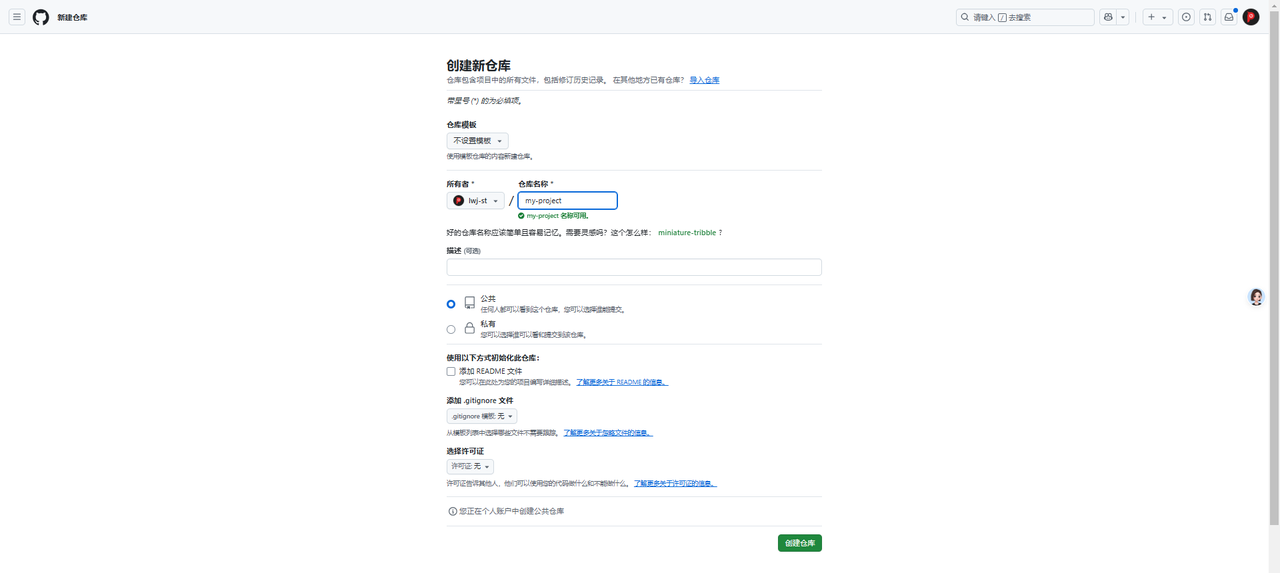

### 1.4 初始化 Git 仓库并推送到 GitHub

1.  在 GitHub 上创建一个新的项目仓库（Repository）。
2.  准备好提交代码需要的 token  [创建教程](https://blog.csdn.net/chengwenyang/article/details/120060010)
3.  在本地初始化 Git 仓库并推送代码：


```bash
>>> mkdir my-project && ​cd​ my-project
>>> echo "# test" >> README.md
>>> git init

# 首次使用需要设置用户名和邮箱
>>> git config --global user.name "你的用户名"
>>> git config --global user.email "你的邮箱"

>>> git add README.md
>>> git commit -m "test"
>>> git branch -M main
>>> git remote add origin <your-repo-url>
>>> git push -u origin main
```



4.  输入用户名及token 即可推到远程仓库



```bash
>>> git push -u origin main
Username for 'https://github.com': lwj-st
Password for 'https://lwj-st@github.com': 
Enumerating objects: 3, done.
Counting objects: 100% (3/3), done.
Writing objects: 100% (3/3), 223 bytes | 223.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/lwj-st/my-project.git
 * [new branch]      main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.
```



### ​1.5​ 添加基本的工程文件

* `README.md`介绍项目用途，示例：

```bash
# my-project

## 介绍
这是一个示例 Python 项目，支持自动化测试、Docker 部署，并符合 PEP 8 代码规范。

## 安装
pip install my-project
```



* `.gitignore`忽略不需要提交的文件，如编译生成的二进制文件、日志文件等 [规则](https://monsterhxw.github.io/posts/git-gitignore-tutorials/)  示例：



```text
        __pycache__
        *.pyc
        test/
        dist/
        tmp/
        .vscode
        build
        *.lock
        *.db
```



* `requirements.txt`记录项目依赖  示例：



```text
        lazyllm
```



* `Dockerfile`：镜像构建文件 📃 创建并推送镜像
* `setup.py`：打包与发布文件 📃 使用 setuptools 进行打包

[相关视频：video/1.mp4](video/1.mp4)

### 1.6 添加主项目文件

项目代码以 【第2讲：10分钟上手一个最小可用RAG系统】为例，添加主代码文件

* `my_project/retriever.py`



In [ ]:
from lazyllm import Retriever, Document

def create_retriever(path: str, query: str):
    """
    创建并执行检索
    
    Args:
        path (str): 文档的绝对路径
        query (str): 查询语句
        
    Returns:
        list: 检索结果
    """
    doc = Document(path)
    retriever = Retriever(doc, group_name="CoarseChunk", similarity="bm25_chinese", topk=3)
    return retriever(query)



* `my_project/__init__.py`



In [ ]:
from .retriever import create_retriever

__version__ = '0.1.0'
__all__ = ['create_retriever']



---

 ## 2. 版本管理和分支策略

良好的分支管理策略有助于多人协作和稳定版本发布。

### 2.1 常见分支命名

* **​主分支​**（​`main`）​：始终保持稳定可发布状态
* **​开发分支​**（​​`dev`​）​：用于日常开发
* **​功能分支​**（`feature/*`​）​：用于开发新功能，完成后合并回 `dev`
* **​修复分支​**（`hotfix/*`​​）​：用于紧急修复生产环境 bug

### 2.2 Git 分支管理操作示例



```bash
# 创建并切换到开发分支
>>> git checkout -b dev

# 在dev分支上新创建功能分支
>>> git checkout -b feature/new-feature

...修改代码...

>>> git add .
>>> git commit -m "Add new feature"
>>> git push origin feature/new-feature

# 开发完成后合并回 dev
>>> git checkout dev

>>> git merge feature/new-feature
>>> git push origin dev
```



### 2.3 在github上提交pull request

* 当改好的代码提到远程仓库后就可以提交pull request了
* 进入 GitHub 仓库主页，点击 "Pull Requests" -> "New Pull Request"
* 如果是同一仓库的Pull Requests 选择对应的 **base （目标分支）** 和 **compare （比对分支）即可**
* 如果是fork仓库的Pull Requests 则有**​​ base repository （目标仓库）​**和 **​base （目标分支）​**默认是fork的源仓库信息，**​head repository （源仓库）​**和**​​ compare （比对分支）​**默认是自己仓库的信息
* 添加 PR 说明，点击 "Create Pull Request"

### 2.4 解决冲突

当多个开发者同时修改同一部分代码并尝试合并时，Git 可能会提示**​ conflict（代码冲突）**

1.  同分支冲突解决

* 当提交代码Git 检测到冲突时，它会输出类似以下信息：



```bash
To https://github.com/lwj-st/my-project.git
 ! [rejected]        dev -> dev (fetch first)
error: failed to push some refs to 'https://github.com/lwj-st/my-project.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
```



* 执行`git pull` merge远程分支



```bash
CONFLICT (content): Merge conflict in requirements.txt
Automatic merge failed; fix conflicts and then commit the result.
```



* 此时，你可以运行`git status`查看哪些文件存在冲突，输出示例：



```bash
>>> git status
On branch dev
Your branch and 'origin/dev' have diverged,
and have 1 and 1 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)

You have unmerged paths.
  (fix conflicts and run "git commit")
  (use "git merge --abort" to abort the merge)

Unmerged paths:
  (use "git add <file>..." to mark resolution)
        both modified:   requirements.txt

no changes added to commit (use "git add" and/or "git commit -a")
```



* 直接修改文件，保留正确的代码然后添加并提交：



```bash
>>> git add requirements.txt
>>> git commit -m "解决冲突"
>>> git push
```



[相关视频：video/2.mp4](video/2.mp4)

---

2.  PR冲突解决

* 如果PR冲突则会在页面出现 **​This branch has conflicts that must be resolved（这个分支有必须解决的冲突）​**如下：

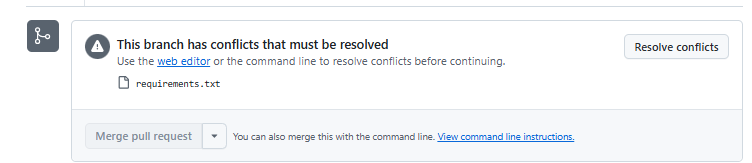

* 页面修改，直接点击 **Resolve conflicts （解决冲突）**
* 编辑冲突文件保留需要的内容后点击 标记为**​​ Mark as resolved（已解决）​**即可
* Git 会在有冲突的文件中标记冲突部分，格式如下：

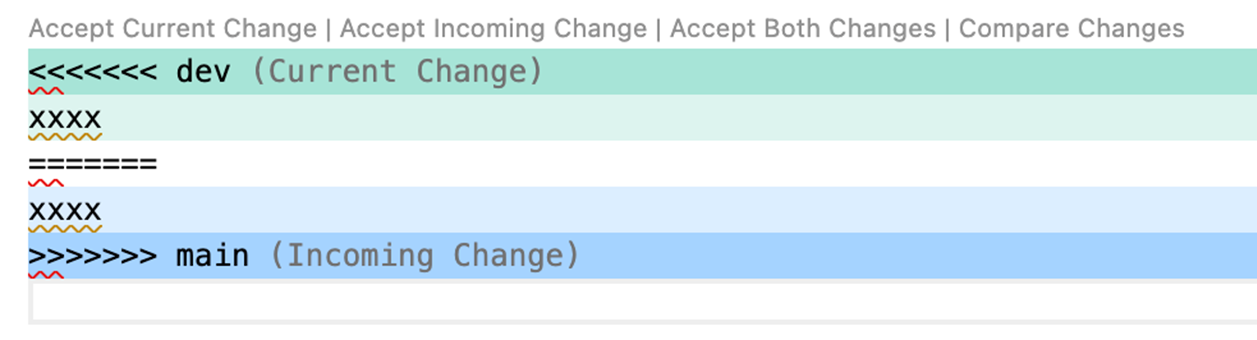


```bash
<<<<<<< dev
xxxx 
=======
xxxx 
>>>>>>> main
```



* `<<<<<<< dev ` 表示 **合并进来的 dev** 的代码
* `=======` 是分隔符
* `>>>>>>> main`  表示 **当前分支（main）** 的代码

[相关视频：video/3.mp4](video/3.mp4)

---

 ## 3. 代码规范与自动检查

为了保证代码质量，我们需要遵循统一的编码规范。

### 3.1 常用代码格式化与风格检查

1.  ​`black`​：自动格式化代码

* 安装 `black`



```bash
>>> pip install black
```



* 格式化整个项目 `black .`



```bash
>>> black .
reformatted /root/my_project/__init__.py
reformatted /root/my_project/retriever.py

All done! ✨ 🍰 ✨
2 files reformatted.
```



* 特点
  * ​**强制代码格式化**​（不能自定义样式，减少团队争议）
  * ​**默认 88 字符换行**​（可调整）
  * ​**自动调整引号**​（优先使用双引号）
  * **对`if-else`​**、列表等结构进行优化**

2.  ​`flake8`​：代码风格检查

* 安装 `flake8`



```bash
>>> pip install flake8
```



* 检查整个项目 `flake8 .` 有问题的话会有日志提示，没日志信息就是最好的信息



```bash
>>> flake8 .
```



* 特点
  * ​**代码风格检查**​：基于 PEP 8 规范，检测缩进、命名、行长度等问题。
  * ​**语法错误检测**​：发现未定义变量、语法错误等潜在 Bug。
  * ​**复杂性分析**​：通过 McCabe 复杂度检查，提示代码是否过于复杂。
  * ​**插件扩展性**​：支持第三方插件，可扩展检查规则（如类型检查）。

3.  ​`pre-commit`​：在提交代码前自动运行检查

* 安装`pre-commit`



```bash
>>> pip install pre-commit
```



* 初始化`pre-commit`



```bash
>>> pre-commit install
```



* 在 `.pre-commit-config.yaml` 中添加规则：



```yaml
repos:
  - repo: https://github.com/psf/black
    rev: 23.1.0
    hooks:
      - id: black

  - repo: https://github.com/pycqa/flake8
    rev: 6.0.0
    hooks:
      - id: flake8
```



---

## 4. 单元测试与代码质量保障

### 4.1 为什么要写单元测试

* 可以确保改动后仍然保持正确性，提高代码质量
* 提高代码的可维护性，降低维护成本
* 单元测试可以发现 Bug，避免意外改动影响已有功能，提高开发效率
* 单元测试可以作为文档，帮助团队理解代码

---

### 4.2 使用 ​`pytest`​ 编写测试

>Pytest 是 Python 语言中最流行的测试框架之一，它可以帮助我们自动化测试代码，确保代码按照预期运行，减少人工测试的工作量。

1.  测试用例规则

* 文件名 必须以 `test_` 开头或 `_test.py` 结尾。
* 类名 必须以 `Test` 开头，并且不能有`init`方法。
* 函数/方法 必须以 `test_` 开头。
* 可通过 `pytest.ini` 自定义规则。

2.  安装 `pytest`：



```bash
>>> pip install pytest
```



3.  创建 `tests/test_retriever.py`：



In [ ]:
import pytest
from my_project import create_retriever

# 测试文档路径
TEST_PATH = "./data_kb"

def test_retriever_contains_keyword():
    test_query = "为我介绍一下2008年北京奥运会"
    expected_keyword = "奥运比赛"
    
    results = create_retriever(TEST_PATH, test_query)
    top_content = results[0].get_content() if results else ""
    
    assert expected_keyword in top_content, f"检索结果中未找到关键词 '{expected_keyword}'"

def test_retriever_empty_query():
    results = create_retriever(TEST_PATH, "")
    assert isinstance(results, list), "结果应该是列表类型"



4.  运行测试：（提前准备好测试数据 ./data\_kb）



```bash
>>> export PYTHONPATH=${PWD}:$PYTHONPATH
>>> pytest --disable-warnings tests/test_retriever.py 
==================================== test session starts ====================================
platform linux -- Python 3.10.9, pytest-8.3.3, pluggy-1.5.0
rootdir: /root
plugins: anyio-4.4.0, hydra-core-1.3.2
collected 2 items                                                                                                                                                                                        

tests/test_retriever.py ..                                                                   [100%]

===================================== 2 passed in 0.01s =====================================
```


* --disable-warnings  忽略警告日志（只会打印错误日志）

---

### 4.3 pytest中常用的标记​（扩展）

1.  pytest 提供了 `markers`（标记） 机制，可以用来分类测试、控制测试执行、参数化测试等。以下是一些常见的 pytest 标记及其用途。
2.  示例 `tests/test_server.py`



In [ ]:
# content of test_server.py
import pytest

@pytest.mark.webtest
def test_send_http():
    pass  # perform some webtest test for your app
    
@pytest.mark.device(serial="123")
def test_something_quick():
    pass
    
@pytest.mark.device(serial="abc")
def test_another():
    pass
    
class TestClass:
    def test_method(self):
        pass



3.  然后，您可以将测试运行限制为仅运行标有 的测试`webtest`



```bash
>>>  pytest -v -m webtest
==================================== test session starts ====================================
platform linux -- Python 3.10.9, pytest-8.3.3, pluggy-1.5.0 -- /opt/miniconda3/envs/lazyllm/bin/python
cachedir: .pytest_cache
rootdir: /root/my-project
plugins: anyio-4.4.0, hydra-core-1.3.2
collected 4 items / 3 deselected / 1 selected

tests/test_server.py::test_send_http PASSED                                           [100%]
======================== 1 passed, 3 deselected, 3 warnings in 0.01s ========================
```



4.  此外，您可以限制测试运行，仅运行与一个或多个标记关键字参数匹配的测试，例如，仅运行标有`device`和特定的测试`serial="123"`：



```bash
>>>  pytest -v -m "device(serial='123')"
==================================== test session starts ====================================
platform linux -- Python 3.10.9, pytest-8.3.3, pluggy-1.5.0 -- /opt/miniconda3/envs/lazyllm/bin/python
cachedir: .pytest_cache
rootdir: /root/my-project
plugins: anyio-4.4.0, hydra-core-1.3.2
collected 4 items / 3 deselected / 1 selected

tests/test_server.py::test_something_quick PASSED                                     [100%]
======================== 1 passed, 3 deselected, 3 warnings in 0.03s ========================
```

5.  更多信息可参考 [markers](https://docs.pytest.org/en/stable/example/markers.html)

---

### 4.4 测试覆盖率

* 在持续集成（CI）中，测试覆盖率是衡量代码质量的重要指标。使用 `pytest` 结合 `pytest-cov` 插件，可以生成详细的测试覆盖率报告，帮助开发者分析哪些代码未被测试。
* 执行测试，添加覆盖率统计：


```bash
>>> export PYTHONPATH=${PWD}:$PYTHONPATH
>>> pytest --cov=my_project --cov-append --cov-report=html
```



* 测试完成后，可以在 **htmlcov ​**目录 查看HTML 报告。
* `pytest --cov=my-project` 统计 `my-project` 目录下的代码覆盖率。
* `--cov-append` 确保多次运行时，覆盖率不会被重置。
* `--cov-report=html` 生成可视化 HTML 报告，帮助分析测试覆盖率。
* 详细可参考 [pytest-cov](https://pytest-cov.readthedocs.io/en/latest/)

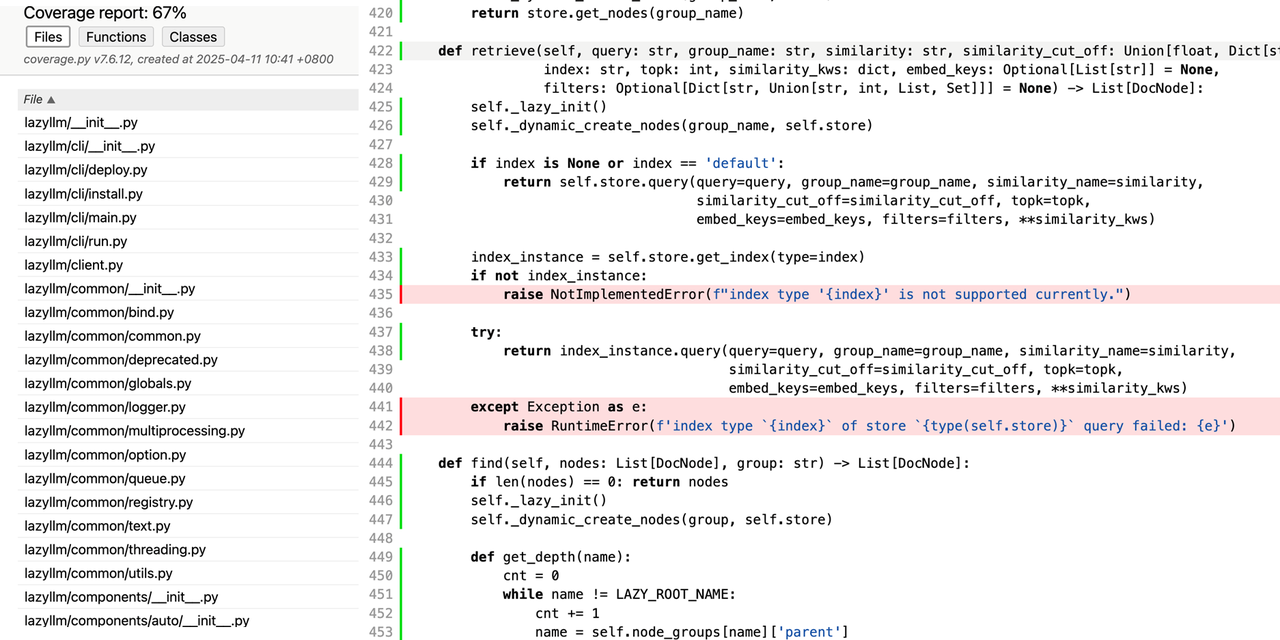
---

 ## 5. 持续集成（CI）：让测试自动化

### 5.1 为什么要CI

1.  传统项目开发测试会遇到下面等问题
   1.  传统手动运行测试，可能会忘记或执行不完整。
   2.  多人协作时，每个人的测试环境可能不同，导致\*\*“在我电脑上能跑”\*\*的问题。
   3.  如果代码合并后才手动测试，可能要到后期才发现 Bug，修复成本更高。
   4.  代码变更较多时，手动测试可能遗漏边界情况。
   5.  不同开发者的代码风格不同，可能导致代码风格混乱。
2.  使用GitHub Actions CI有下面等优点
   1.  每次**​提交（push）​**或**​拉取请求（pull request）​**时，自动运行测试，避免问题进入主分支。
   2.  开发者能在第一时间知道代码是否通过所有测试。
   3.  代码测试在标准化的GitHub Runner环境运行，不受开发者本地环境影响。
   4.  可以并行运行多个测试，加快反馈速度。
   5.  使用 ​**`prettier`**​**​、​**​​**`black`**​**​、​**​​**`flake8`**​**​、​**​**`eslint`** 等工具，自动检查代码格式，保持代码风格一致。
   6.  Github 提供免费的runner使用，可以白嫖

---

### ​5.2 配置CI

* 添加 `.github/workflows/test.yml` ：



```yaml
name: Run Tests
on: [push, pull_request]
jobs:
  test:
    runs-on: ubuntu-latest
    steps:
      - uses: actions/checkout@v3
      - name: Set up Python
        uses: actions/setup-python@v3
        with:
          python-version: "3.10"
      - name: Install dependencies
        run: pip install -r requirements.txt
      - name: Run tests
        run: |
          export PYTHONPATH=${PWD}:$PYTHONPATH 
          pytest
```


* 可实现每次提交pr或合入分支时进行测试

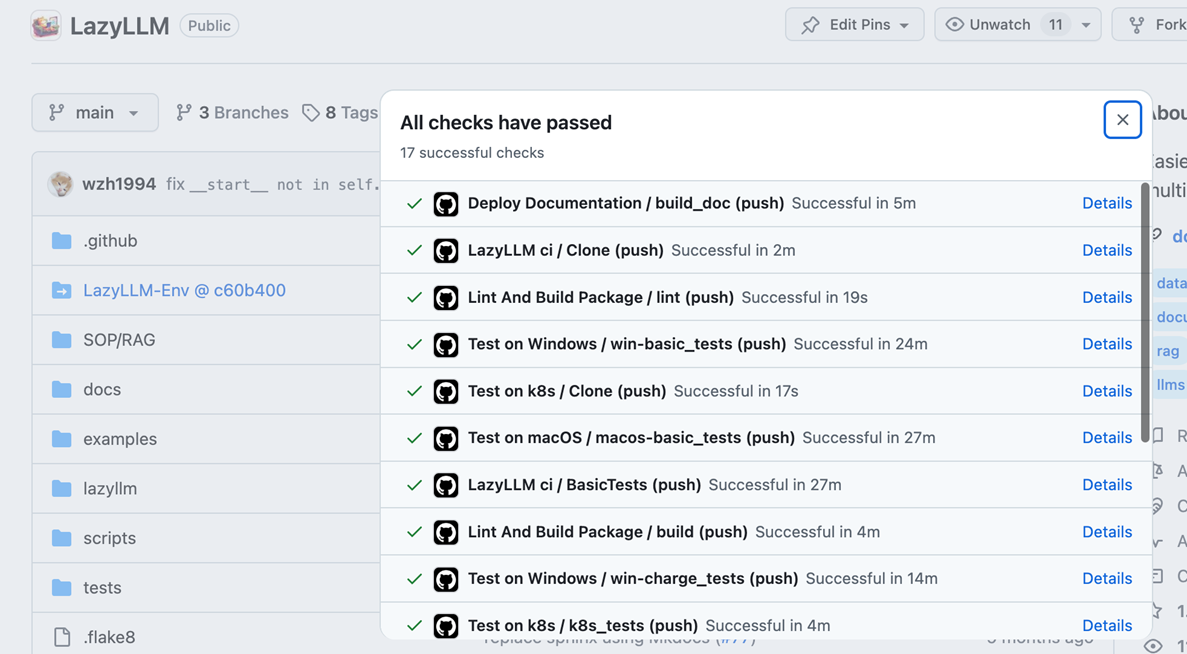

---

 ## 6. 代码文档管理：用 MkDocs 搭建文档系统

### 6.1 为什么要用MkDocs

1.  在项目开发过程中，文档管理常常遇到以下问题：
   1.  不同开发者可能使用 **Word、Markdown、PDF、Wiki** 等不同格式，导致难以维护。
   2.  许多文档存储在本地，缺少版本控制，难以追踪更改历史。
   3.  需要手动更新编译，过程繁琐。
2.  使用MkDocs 可以很好的这些问题
   1.  使用 Markdown 编写，简单易读，统一格式，降低学习成本。
   2.  Git 版本控制，文档与代码一起管理，随代码更新而更新。
   3.  结合 GitHub Actions 或 Read the Docs，提交代码后自动生成最新文档，无需手动更新。

---

### ​6.2​ 使用 MkDocs 生成文档

1.  安装依赖包，有关详细信息，请参阅[安装指南](https://www.mkdocs.org/user-guide/installation/)。



```bash
>>> pip install mkdocs
```



2.  初始化 MkDocs：



```bash
>>> mkdocs new my-project
>>> cd my-project
```



3.  创建文件目录如下：有一个配置文件`mkdocs.yml`，以及一个名为  `docs` 的文件夹，其中包含您的文档源文件（是[docs\_dir](https://www.mkdocs.org/user-guide/configuration/#docs_dir) 配置设置的默认值）。目前该 `docs` 文件夹仅包含一个名为`index.md` 的文档页面。



```yaml
my-project/
├── docs
│   └── index.md
└── mkdocs.yml
```



4.  查看项目

* 然后通过运行以下命令启动服务器`mkdocs serve`
  * 端口被占用时可以用 `-a` 指定端口 `mkdocs serve -a 0.0.0.0:8008`
  


```bash
  $ mkdocs serve
  INFO    -  Building documentation...
  INFO    -  Cleaning site directory
  INFO    -  Documentation built in 0.22 seconds
  INFO    -  [15:50:43] Watching paths for changes: 'docs', 'mkdocs.yml'
  INFO    -  [15:50:43] Serving on http://127.0.0.1:8000/
```

* 在浏览器中打开[http://127.0.0.1:8000/](http://127.0.0.1:8000/)，您将看到显示的默认主页：
* 详细配置参考：https://www.mkdocs.org/

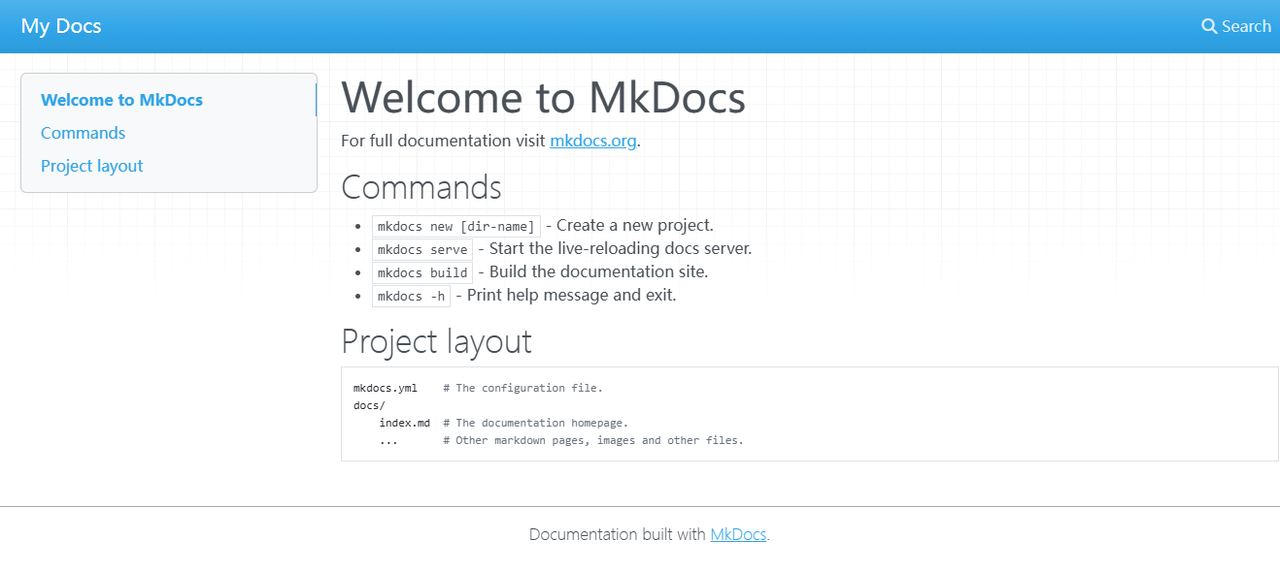

---

### ​6.3 托管到 Read the Docs

1.  为什么选择**Read the Docs ？**

在开发项目时，良好的 **文档** 是不可或缺的。相比把文档散落在本地文件、Markdown 文件或 Wiki 页面上，**Read the Docs** 提供了一个高效的在线文档托管和自动构建平台，特别适合 **开源项目** 和 ​**持续更新的技术文档**​。

以下是托管到 Read the Docs 的几个核心优势：

* ​**自动构建**​：推送代码到 GitHub，Read the Docs 就会 自动构建并更新文档。
* ​**版本管理**​：支持多个文档版本，可以让用户查看不同版本的文档（比如 `latest`、`stable`、`v1.0`）
* **在线搜索： ​**提供在线搜索功能，可以快速查找内容。
* ​**免费托管**​：完全免费，不需要额外购买服务器或域名。且自带​**https 安全访问**​，无需配置 SSL 证书。

2.  添加`.readthedocs.yaml` 文件 [配置说明](https://docs.readthedocs.com/platform/stable/config-file/v2.html)



```yaml
# .readthedocs.yaml
# Read the Docs 配置文件

# 必需的版本字段
version: 2

# 设置构建环境
build:
  os: ubuntu-24.04
  tools:
    python: "3.10"  # MkDocs 需要 Python

# 配置 MkDocs
mkdocs:
  configuration: mkdocs.yml  # 默认的 MkDocs 配置文件

# 可选：指定 Python 依赖（如果有）
#python:
#  install:
#    - requirements: requirements.txt  # 如果你有依赖文件
```



3.  注册 [Read the Docs](https://readthedocs.org/) 账号 （选择github自动登录）
4.  在 Read the Docs 主页，点击 `导入一个项目`（​**Import a Project​**）​。
5.  选择需要托管的 GitHub 仓库，点击 **➕** 继续。
6.  设置
   1.  名称 ：默认仓库名
   2.  默认分支 ：选主分支
   3.  语言：该项目的文档所呈现的语言
7.  点击 ​`下一页`​，系统会开始自动构建文档。
8.  Read the Docs 会自动构建并托管文档
9.  查看文档 [https://<your-project>.readthedocs.io/](https://your-project.readthedocs.io/)   <your-project> 换成自己的项目名

[相关视频：video/4.mp4](video/4.mp4)

---

## 7. 制品

### 7.1 为什么要做制品

在 Python 项目开发过程中，除了编写代码，我们通常还需要将项目打包成 **可发布、可安装、可复现** 的格式，这些被称为 ​**制品（Artifacts）**​。制品可以是 ​**Python 包（wheel、sdist）、Docker 镜像、二进制文件、可执行程序**​。

项目制作制品的核心意义：

* ​**便于发布与分发**​：如果没有制品，用户需要自己下载源码、安装依赖、配置环境，过程繁琐且容易出错。
* ​**确保环境一致性**​：不同环境（开发、测试、生产）可能依赖不同版本的软件，导致程序行为不一致。
* ​**便于测试与回滚**​：有对应的制品方便直接选用对应的版本的制品使用，如果没有制品，每次测试都需要重新搭建环境，回滚版本困难。

### 7.2 whl包制品

#### 7.2.1 为什么要做whl包制品

`.whl`（Wheel）是一种 ​**Python 包的二进制分发格式**​，相比源码安装更高效，广泛用于发布和部署 Python 项目。

* **提高安装速度: ​**打成whl包可以直接通过 `pip install my-project.whl` 比源码安装更快
* **​行业共识：​**现在python制品通常都是做成whl包，并上传官方pypi仓库，方便更好的传播与使用

---

#### ​7.2.2​ 使用 `setuptools​` ​ 进行打包

在 `setup.py` 中定义：



In [ ]:
from setuptools import setup, find_packages

setup(
    name="my_project",
    version="0.1.0",
    packages=find_packages(),
    install_requires=[
        "lazyllm", 
    ],
    author="Your Name",
    author_email="your@email.com",
    description="A simple RAG retriever package",
    long_description=open("README.md").read(),
    long_description_content_type="text/markdown",
    python_requires=">=3.6",
)



生成 `.whl` 包：



```bash
>>> python setup.py bdist_wheel
running bdist_wheel
running build
running build_py
creating build
creating build/lib
creating build/lib/my_project

....

adding 'my_project-0.1.0.dist-info/WHEEL'
adding 'my_project-0.1.0.dist-info/top_level.txt'
adding 'my_project-0.1.0.dist-info/RECORD'
removing build/bdist.linux-x86_64/wheel
>>> ls dist/
my_project-0.1.0-py3-none-any.whl
```



---

#### ​7.2.3 注册pypi账号

1.  访问 [PyPI 官网](https://pypi.org/) 创建账号并登录。
2.  点击右上角 "[Account settings](https://pypi.org/manage/account/)" 进入设置页面。
3.  在 "API tokens"（API 令牌） 部分，点击 "Add API token"（添加 API 令牌）。
4.  配置 Token：
   1.  名称（Name）：例如 `INDEX_PYPI_TOKEN`
   2.  作用范围（Scope）：
      * Entire account（整个账户）：允许管理所有 PyPI 项目（不推荐）
      * Specific project（指定项目）：建议选择你的项目名称（更安全）
5.  点击 Create token（创建令牌）。
6.  复制生成的 API Token（仅显示一次，注意：不要泄露此令牌！）

---

#### 7.2.4 制作并推送whl包

7.  本地添加  `~/.pypirc` 文件



```bash
[pypi]
  username = __token__
  password = pypi-xxxxxxxxxxxxxxxxxxxYjNjNS0xMDExNWMwMzhlNDMiXQAABiDpxiNjoqIT3SJDNrQPP-BJl_AhO7pHErgKvOnS4jzNrQ
```


8.  安装工具及上传制品



```bash
>>> pip install twine
>>> twine upload dist/*
```



---

#### 7.2.5 通过持续部署来发布应用

>通过集成github action实现自动化发布，是github项目经常使用的一种方式，不用人为手动构建，可以在设定情况下构建包并上传到官方pypi仓库 （比如 打tag）

1.  进入你的 GitHub 仓库 。
2.  点击 "Settings" → "Secrets and variables" → "Actions"。
3.  在 "Secrets" 部分点击 "New repository secret"。
4.  填写：
   1.  Name（名称）：如 `INDEX_PYPI_TOKEN`
   2.  Value（值）：粘贴你的 API Token
5.  点击 "Add secret"。
6.  仓库中添加`.github/workflows/publish-to-pypi.yaml`文件



```yaml

name: Publish to PyPI

on:
  push:
    tags:
      - "v*"  # 仅在创建 tag（如 v1.0.0）时触发

jobs:
  deploy:
    runs-on: ubuntu-latest
    steps:
      - name: Checkout repository
        uses: actions/checkout@v3

      - name: Setup Python
        uses: actions/setup-python@v4
        with:
          python-version: "3.x"

      - name: Install dependencies
        run: |
          python -m pip install --upgrade pip
          pip install build twine

      - name: Build package
        run: python -m build

      - name: Upload to PyPI
        env:
          INDEX_PYPI_TOKEN: ${{ secrets.INDEX_PYPI_TOKEN }}
        run: |
          twine upload --username __token__ --password $INDEX_PYPI_TOKEN dist/*
```



* 每次打tag时，会自动触发编译whl包，并上传至官方仓库

#### 7.2.6 使用

1.  然后其他人就可以通过pip来安装你的项目，默认最新版本。



```bash
>>> pip install my-project
```


2.  也可以限制版本安装



```bash
>>> pip install "my-project==0.1.0"
>>> pip install "my-project>=0.1.0"
```



---

### 7.3 镜像制品

#### 7.3.1 为什么要做Docker镜像

>**Docker** 是一种开源的容器化平台，用于自动化应用部署。它通过容器技术将应用程序及其依赖打包成一个 ​**轻量**​、**可移植**的单元，能在不同环境中一致运行。

使用Docker制作镜像制品有下面好处：

* **​环境一致性：​**避免“在我机器上能跑，但在服务器上不行”的问题。保证在 开发、测试、生产 环境，代码和依赖都一样。
* **​便于部署和扩展：​**一次构建，随处运行，可以在 服务器、Kubernetes、云环境 运行。
* **​行业影响力：​**Docker在业内使用广泛，有自己的官网，基于此有利于更好的传播与使用。

#### 7.3.2 注册 Docker Hub 账号

* 访问 [Docker Hub 官网](https://hub.docker.com/) 并注册一个账号。注册的账号名就是 **命名空间（Namespace）**
* 注册成功后，登录你的 Docker Hub 账户。

---

#### 7.3.3 创建仓库（​Repository​）

1.  点击右上角的**​ ​**[Create a repository](https://hub.docker.com/repository/create) (创建仓库) 。
2.  填写仓库信息：

* Repository Name（仓库名称）：如 `my-project`
* Visibility（可见性）：
  * Public（公开）：任何人都可以拉取你的镜像
  * Private（私有）：只有你或授权用户可以访问

3.  点击 Create（创建）。

---

#### 7.3.4 登录 Docker Hub

* 在终端或命令行运行：



```bash
>>> docker login
```



* 然后浏览器打开 https://login.docker.com/activate ，并输入终端对应的code `SPQK-WMDJ` 。如果登录成功，会显示：`Login Succeeded`

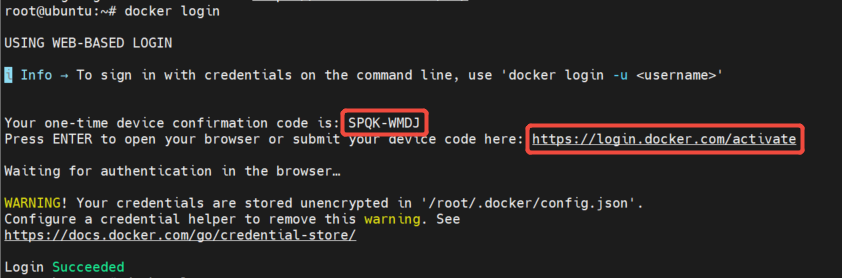

---

#### 7.3.5 构建并推送镜像

1.  编辑`Dockerfile`



```bash
# 1. 选择基础镜像
FROM python:3.10

# 2. 设置环境变量
ENV PYTHONUNBUFFERED=1

# 3. 创建应用文件夹
RUN mkdir /app

# 4. 拷贝源码
COPY my_project /app/my_project
COPY requirements.txt /tmp/requirements.txt
ENV PYTHONPATH="/app:${PYTHONPATH}"

# 5. 安装依赖
RUN pip install -r /tmp/requirements.txt \
    && rm -rf /tmp/requirements.txt

# 6. 创建非 root 用户，提升安全性
RUN useradd -m myuser
USER myuser

# 7. 设置默认启动命令 
CMD ["/bin/bash"]
```



2.  构建镜像



```bash
>>> docker build  -t username/my-project:0.1.0 .
```



3.  发布镜像



```bash
>>> docker push username/my-project:0.1.0
```



#### 7.3.6 镜像使用

1.  拉取镜像



```bash
>>> docker pull username/my-project:0.1.0
```



2.  起容器使用



```bash
>>> docker run -it --name my-project username/my-project:0.1.0
```